## BBM409 ASSIGNMENT 1

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data [1]. Maximum Likelihood Estimation requires that the data are sampled from a multivariate normal distribution [2]. 

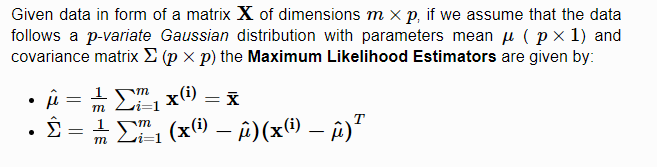

This assignment consists of 3 steps explained below.

Note: Don't forget to add comments in your codes.

[1]: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.

[2]: https://online.stat.psu.edu/stat505/lesson/12/12.7

**Step 1 :** You are provided two CSV files that contains samples derived from two bivariate Gaussian distributions separately; Class1.csv corresponds to $w_{1}$ class distribution, Class2.csv to $w_{2}$.  Estimate the parameters of these distributions using the max-likelihood estimates (given above) on the given data samples for both classes. (10 points) 

Write your codes in the cells shared below.

Center of the bivariate normal distribution for classes
class 1 : [-1.60184933 -1.74017087]
class 2 : [5.03279004 3.00261806]

Covariance matrix for classes
class 1:
[[ 1.57171937 -0.52997235]
 [-0.52997235  2.99853667]]
class 2:
[[1.62784462 0.51664892]
 [0.51664892 0.76483477]]



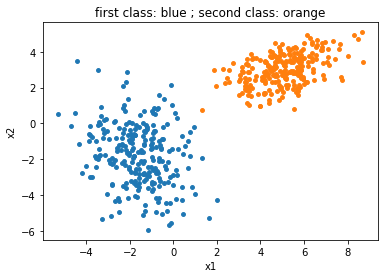

In [14]:
import csv
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

#variables is assigned here
temp_mean_x1, temp_mean_x2 = 0,0
# optimal center location vectors and covariance matrices are stored in these lists
estimated_parameters_1, estimated_parameters_2 = [], []

# this functions finds the optimal center of bivariate gaussian model 
def Estimate_Mean(data):
    
    global temp_mean_x1, temp_mean_x2
    
    num_of_data = len(data)
    x1_counter, x2_counter = 0, 0
    
    for i in range(num_of_data):
        x1_counter += data[i][0]
        x2_counter += data[i][1]
    
    temp_mean_x1 = x1_counter / num_of_data
    temp_mean_x2 = x2_counter / num_of_data
    
    
# this functions finds the optimal covariance matrix of bivariate gaussian model
def Estimate_Covariance(data, center_loc):
    
    num_of_data = len(data)
    sum = np.zeros([2,2])
    
    for sample in data:
        
        sample = sample - center_loc
        
        #converting 1D to 2D
        sample = sample.reshape((1, sample.shape[0]))
        
        #taking transpose of that sample
        T_sample = sample.transpose()
        
        #finally dot product happens and result is stored in sum variable
        res = T_sample @ sample
        sum = sum + res
        
    return sum / num_of_data


# this functions is for the clarity, simply it calls the other 2 functions
def Estimate_Parameters(data, estimated_values):
    Estimate_Mean(data)
    center_loc = np.array([temp_mean_x1, temp_mean_x2])
    covariance = Estimate_Covariance(data, center_loc)
    
    estimated_values.append(center_loc)
    estimated_values.append(covariance)
    
def Plot_Data(class_data):
    data_x = class_data.values[:1, 1:]
    data_y = class_data.values[1:, 1:]
    plt.scatter(data_x, data_y, s=15)



#read the data from the csv files
raw_data_class1 = open("Class1.csv", "r")
class1_data = read_csv(raw_data_class1)
data_1 = class1_data.values.transpose()[1:,:]
# --- 
raw_data_class2 = open("Class2.csv", "r")
class2_data = read_csv(raw_data_class2)
data_2 = class2_data.values.transpose()[1:,:]


# plot the data
Plot_Data(class1_data)
Plot_Data(class2_data)
plt.title("first class: blue ; second class: orange")
plt.xlabel("x1")
plt.ylabel("x2")

# estimate the parameters of the distributions using the max-likelihood estimates
Estimate_Parameters(data_1, estimated_parameters_1)
Estimate_Parameters(data_2, estimated_parameters_2)

print("Center of the bivariate normal distribution for classes")
print("class 1 : " + str(estimated_parameters_1[0]))
print("class 2 : " + str(estimated_parameters_2[0]))

print("\nCovariance matrix for classes")
print("class 1:")
print(estimated_parameters_1[1])
print("class 2:")
print(estimated_parameters_2[1], end="\n\n")

**Step 2 :** Write a program to find the decision boundaries between the two distributions for $w_{1}$ and $w_{2}$; and plot them. (50 points)

Please explain briefly, why the decision boundary is in the form that you obtained? 

In [ ]:
#code here

(your explanation here)

**Step 3 :** You are provided a set of test samples in another CSV file. For each sample in that file, assign the given test samples to the appropriate classes according to the Bayesian Minimum Error-Rate principle. (40 points)

Provide the classification results in tabular form; each row contains the data in the form: ($x_{i_1}$, $x_{i_2}$, $w_{i}$), where $x_{i_1}$ and $x_{i_2}$ represents the value of the first and the second features, respectively; $w_{i}$ represents the assigned class index, i.e. 1 or 2. 

Plot your classification result. Make sure that all samples are depicted in one plot embedded on the computed 
densities with a distinguished color.

Use following prior probabilities: 

Case 1: P($w_{1}$) = P($w_{2}$) = 0.5

Case 2: P($w_{1}$) = 0.8, P($w_{2}$) = 0.2


In [ ]:
#code here